In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

/home/zafar/.pyenv/versions/2.7.13/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [4]:
from keras.datasets import imdb
from keras.preprocessing import sequence

max_features = 10000

print "Loading data..."

(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words = max_features)
print len(input_train), "train sequences"
print len(input_test), "test sequences"

Loading data...
25000 train sequences
25000 test sequences


In [16]:
maxlen = 500
# maxlen = 1000
print 'Pad sequence (samples x time)'
x_train = sequence.pad_sequences(input_train, maxlen=maxlen)
x_test = sequence.pad_sequences(input_test, maxlen=maxlen)
print "x_train shape:", x_train.shape
print "x_test shape:", x_test.shape

Pad sequence (samples x time)
x_train shape: (25000, 1000)
x_test shape: (25000, 1000)


In [6]:
from keras.layers import Dense, Embedding, SimpleRNN
from keras.models import Sequential

In [7]:
model = Sequential()
model.add(Embedding(max_features, 32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

In [8]:
batch_size = 128
history = model.fit(x_train, y_train,
                    epochs = 10,
                    batch_size = batch_size,
                    validation_split = 0.2
)

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 14s 711us/step - loss: 0.6456 - acc: 0.6119 - val_loss: 0.5032 - val_acc: 0.7860
Epoch 2/10
20000/20000 [==============================] - 14s 683us/step - loss: 0.4188 - acc: 0.8205 - val_loss: 0.4518 - val_acc: 0.8032
Epoch 3/10
20000/20000 [==============================] - 14s 689us/step - loss: 0.3166 - acc: 0.8722 - val_loss: 0.3758 - val_acc: 0.8338
Epoch 4/10
20000/20000 [==============================] - 14s 694us/step - loss: 0.2519 - acc: 0.9025 - val_loss: 0.3781 - val_acc: 0.8368
Epoch 5/10
20000/20000 [==============================] - 14s 691us/step - loss: 0.2081 - acc: 0.9211 - val_loss: 0.4999 - val_acc: 0.8012
Epoch 6/10
20000/20000 [==============================] - 14s 692us/step - loss: 0.1632 - acc: 0.9405 - val_loss: 0.3858 - val_acc: 0.8540
Epoch 7/10
20000/20000 [==============================] - 14s 691us/step - loss: 0.1535 - acc: 0.9455 - val_loss: 0.4

In [9]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = np.arange(1, len(acc) + 1)

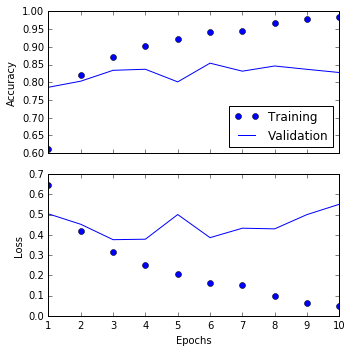

In [10]:
fig, ax = plt.subplots(2, 1, figsize=(5, 5), sharex = True)

ax[0].plot(epochs, acc, 'bo', label='Training')
ax[0].plot(epochs, val_acc, 'b', label='Validation')
ax[0].set_ylabel("Accuracy")
ax[0].legend(loc='best')

ax[1].plot(epochs, loss, 'bo', label='Training')
ax[1].plot(epochs, val_loss, 'b', label='Validation')
ax[1].set_ylabel("Loss")
ax[1].set_xlabel("Epochs")

plt.tight_layout()

# LSTM

In [17]:
from keras.layers import LSTM

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

In [18]:
history = model.fit(x_train, y_train, epochs=10, batch_size=128, validation_split=0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 120s 6ms/step - loss: 0.4992 - acc: 0.7641 - val_loss: 0.5307 - val_acc: 0.7772
Epoch 2/10
20000/20000 [==============================] - 120s 6ms/step - loss: 0.2963 - acc: 0.8842 - val_loss: 0.2950 - val_acc: 0.8770
Epoch 3/10
20000/20000 [==============================] - 120s 6ms/step - loss: 0.2309 - acc: 0.9126 - val_loss: 0.2841 - val_acc: 0.8886
Epoch 4/10
20000/20000 [==============================] - 120s 6ms/step - loss: 0.2008 - acc: 0.9248 - val_loss: 0.8168 - val_acc: 0.7618
Epoch 5/10
20000/20000 [==============================] - 120s 6ms/step - loss: 0.1800 - acc: 0.9350 - val_loss: 0.2910 - val_acc: 0.8768
Epoch 6/10
20000/20000 [==============================] - 120s 6ms/step - loss: 0.1583 - acc: 0.9430 - val_loss: 0.3456 - val_acc: 0.8886
Epoch 7/10
20000/20000 [==============================] - 120s 6ms/step - loss: 0.1430 - acc: 0.9488 - val_loss: 0.3204 - v

In [19]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = np.arange(1, len(acc) + 1)

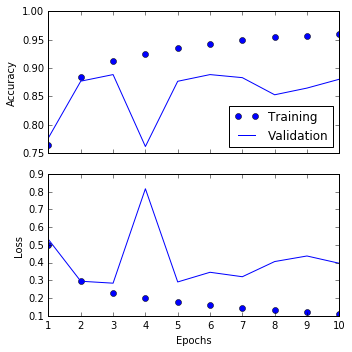

In [20]:
fig, ax = plt.subplots(2, 1, figsize=(5, 5), sharex = True)

ax[0].plot(epochs, acc, 'bo', label='Training')
ax[0].plot(epochs, val_acc, 'b', label='Validation')
ax[0].set_ylabel("Accuracy")
ax[0].legend(loc='best')

ax[1].plot(epochs, loss, 'bo', label='Training')
ax[1].plot(epochs, val_loss, 'b', label='Validation')
ax[1].set_ylabel("Loss")
ax[1].set_xlabel("Epochs")

plt.tight_layout()

In [21]:
model.evaluate(x_test, y_test)

25000/25000 [==============================] - 115s 5ms/step


[0.44035520686626434, 0.8646]